In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('blackFriday_train.csv')

print(df1.shape)
df1.head()

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df2 = pd.read_csv('blackFriday_test.csv')
pd.set_option( "display.max_columns", None)
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df = df1.append(df2, sort=False)
df.shape

(783667, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [8]:
df['Gender'] =df['Gender'].map({'M':1,'F':0})

In [9]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [10]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Age'] = df.Age.map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6, '55+':7})

In [12]:
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [13]:
df.drop('User_ID',axis=1,inplace=True)

In [14]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [15]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
city = pd.get_dummies(df['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [17]:
df = pd.concat([df,city],axis=1)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [18]:
df.Stay_In_Current_City_Years.dtype

dtype('O')

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+','4')

In [21]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4,0,10,16.0,NaN,NaN,0,1


In [22]:
df.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2', 'Product_Category_3':'cat3'},inplace=True)

In [23]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4,0,10,16.0,NaN,NaN,0,1


In [24]:
df['cat2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: cat2, dtype: int64

In [25]:
df['cat2'].fillna(df['cat2'].mode()[0],inplace=True)

In [26]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                          545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [27]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4,1,8,8.0,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4,0,10,16.0,NaN,NaN,0,1


In [28]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4,1,8,8.0,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4,0,10,16.0,NaN,NaN,0,1


In [29]:
df['cat3'].fillna(df['cat3'].mode()[0],inplace=True)

In [30]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat1                               0
cat2                               0
cat3                               0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [31]:

df['Purchase'].fillna(df['Purchase'].mean(),inplace=True)

In [32]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [33]:
df.drop('City_Category',axis=1, inplace=True) 

In [34]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.000000,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.000000,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.000000,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.000000,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,9263.968713,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,9263.968713,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,9263.968713,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,9263.968713,0,1


In [35]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [36]:
df['Purchase']=np.round(df.Purchase,1,)

In [37]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,9264.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,9264.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,9264.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,9264.0,0,1


In [38]:
df_i = df.copy()


In [39]:
df_i

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,4,1,8,8.0,16.0,9264.0,1,0
233595,P00254642,0,3,15,4,1,5,8.0,16.0,9264.0,1,0
233596,P00031842,0,3,15,4,1,1,5.0,12.0,9264.0,1,0
233597,P00124742,0,5,1,4,0,10,16.0,16.0,9264.0,0,1


In [40]:
df_i.drop(columns='Product_ID',axis=1,inplace=True)

In [41]:
df_i

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8.0,16.0,9264.0,1,0
233595,0,3,15,4,1,5,8.0,16.0,9264.0,1,0
233596,0,3,15,4,1,1,5.0,12.0,9264.0,1,0
233597,0,5,1,4,0,10,16.0,16.0,9264.0,0,1


In [42]:
df_i['cat2'] = df_i['cat2'].astype(int )

In [43]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   cat1                        783667 non-null  int64  
 6   cat2                        783667 non-null  int32  
 7   cat3                        783667 non-null  float64
 8   Purchase                    783667 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 59.8 MB


In [44]:
df_i

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8,16.0,8370.0,0,0
1,0,1,10,2,0,1,6,14.0,15200.0,0,0
2,0,1,10,2,0,12,8,16.0,1422.0,0,0
3,0,1,10,2,0,12,14,16.0,1057.0,0,0
4,1,7,16,4,0,8,8,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8,16.0,9264.0,1,0
233595,0,3,15,4,1,5,8,16.0,9264.0,1,0
233596,0,3,15,4,1,1,5,12.0,9264.0,1,0
233597,0,5,1,4,0,10,16,16.0,9264.0,0,1


In [45]:
df_i['cat3'] = df_i['cat3'].astype(int )
df_i['Purchase'] = df_i['Purchase'].astype(int )


In [46]:
df_i

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8,16,8370,0,0
1,0,1,10,2,0,1,6,14,15200,0,0
2,0,1,10,2,0,12,8,16,1422,0,0
3,0,1,10,2,0,12,14,16,1057,0,0
4,1,7,16,4,0,8,8,16,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,4,1,8,8,16,9264,1,0
233595,0,3,15,4,1,5,8,16,9264,1,0
233596,0,3,15,4,1,1,5,12,9264,1,0
233597,0,5,1,4,0,10,16,16,9264,0,1


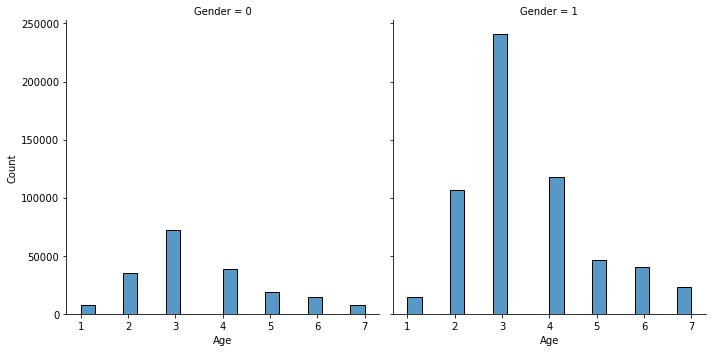

In [47]:
#visulising age and gender
sns.displot(df_i, x="Age", col='Gender',bins=20, multiple="dodge")


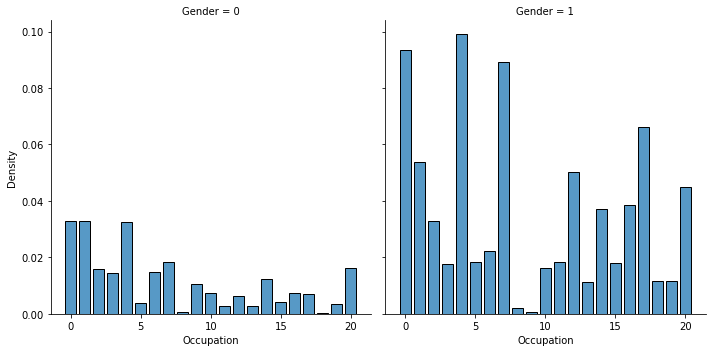

In [48]:
#gender in Occupation
sns.displot(data= df_i, col="Gender",x='Occupation',stat="density",shrink=.8,discrete=True)

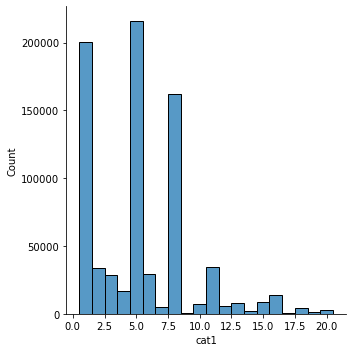

In [50]:
sns.displot(df_i, x="cat1",discrete=True)

C:\Users\arche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

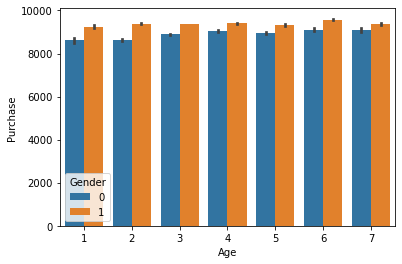

In [51]:
sns.barplot('Age','Purchase',hue='Gender',data=df_i)

In [52]:
df_i.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'cat1', 'cat2', 'cat3', 'Purchase', 'B', 'C'],
      dtype='object')

C:\Users\arche\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Gender'>

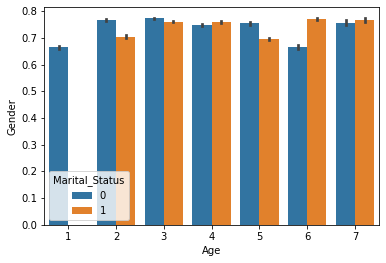

In [53]:
sns.barplot('Age','Gender',hue='Marital_Status',data=df_i)

In [54]:
x = df_i.drop('Purchase',axis=1)

In [55]:
y = df_i.Purchase

In [60]:
print(x.shape)
print(y.shape)

(783667, 10)
(783667,)


In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [74]:
print(x_tain.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(587750, 10)
(195917, 10)
(195917,)
(587750,)


In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [76]:
X_train = sc.fit_transform(x_tain)
X_test = sc.transform(x_test)

In [77]:
X_train

array([[ 0.57275431, -0.36745197,  0.6008837 , ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431,  1.10995723, -0.16579251, ...,  0.36937114,
         1.17365495, -0.67228678],
       ...,
       [ 0.57275431,  1.84866184,  1.67423038, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [ 0.57275431, -1.10615657, -0.93246871, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.36745197, -1.23913919, ...,  0.36937114,
        -0.85203918,  1.48746045]])

In [78]:
X_test

array([[1.00000000e+00, 3.00000000e+00, 4.00000000e+00, ...,
        1.60000000e+01, 7.12053886e-18, 4.85018708e-17],
       [5.32468818e-17, 2.00000000e+00, 4.00000000e+00, ...,
        1.60000000e+01, 1.00000000e+00, 4.85018708e-17],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, ...,
        1.60000000e+01, 7.12053886e-18, 4.85018708e-17],
       ...,
       [1.00000000e+00, 2.00000000e+00, 1.40000000e+01, ...,
        5.00000000e+00, 1.00000000e+00, 4.85018708e-17],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+01, ...,
        1.60000000e+01, 7.12053886e-18, 1.00000000e+00],
       [5.32468818e-17, 5.00000000e+00, 1.20000000e+01, ...,
        1.60000000e+01, 7.12053886e-18, 1.00000000e+00]])